In [121]:
import pandas as pd
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import tqdm

import torch
import faiss

from PIL import Image
import mobileclip

model, _, preprocess = mobileclip.create_model_and_transforms('mobileclip_s0', pretrained='./models/mobileclip_s0.pt')
model=model.to('mps')

tokenizer = mobileclip.get_tokenizer('mobileclip_s0')

In [27]:
files=glob("data/archive/Backpacks.csv")[:10]
df=pd.read_csv(files[0])#
df.head()

print(len(df))

N=len(df)
d=512
assert
embeddings = np.zeros((N,d))

2064


In [77]:

for i in tqdm.tqdm(range(N), total=N):
    if embeddings[i].all():
        continue
    image_url = df['image'][i]
    response = requests.get(image_url)

    if response.status_code != 400:
        im=Image.open(BytesIO(response.content))
        features = preprocess(im.convert('RGB')).unsqueeze(0)
        with torch.no_grad(), torch.cuda.amp.autocast():
            image_features = model.encode_image(features).numpy()
        embeddings[i] = image_features
        continue

np.save(file='backpacks.npy', arr=embeddings)

100%|██████████| 2064/2064 [03:19<00:00, 10.35it/s] 


In [83]:
# Power TOOLS

In [233]:
cats = pd.read_csv("data/archive-3/amazon_categories.csv")
df=pd.read_csv("data/archive-3/amazon_products.csv")
#id = cats[cats['category_name']=='Power Tools & Hand Tools'].id.values
#df=df[df['category_id'] == id[0]]



In [116]:
print(len(df))

N=len(df)
df.index = range(N)
d=512
assert
embeddings = np.zeros((N,d))

3852


In [139]:

for i in tqdm.tqdm(range(N), total=N):
    if embeddings[i].all():
        continue
    image_url = df['imgUrl'][i]
    response = requests.get(image_url)

    if response.status_code != 400:
        im=Image.open(BytesIO(response.content))
        features = preprocess(im.convert('RGB')).unsqueeze(0).to('mps')
        with torch.no_grad(), torch.cuda.amp.autocast():
            image_features = model.encode_image(features).cpu().numpy()
        embeddings[i] = image_features
        continue

np.save(file='powertools.npy', arr=embeddings)

100%|██████████| 3852/3852 [16:43<00:00,  3.84it/s]   


In [143]:
index = faiss.IndexFlatL2(d)
index.add(embeddings)

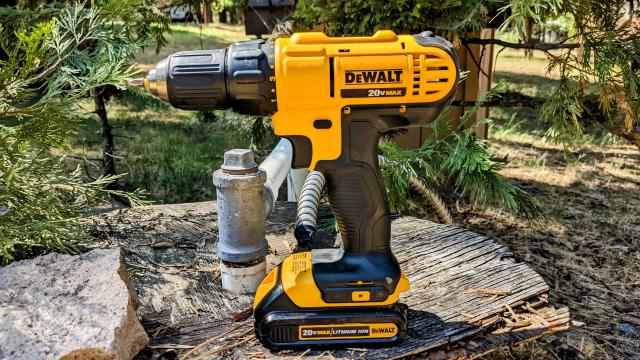

In [160]:
im=Image.open("dewalt.jpeg")
im

/Users/nikita/venv/lib/python3.9/site-packages/torch/amp/autocast_mode.py:202: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


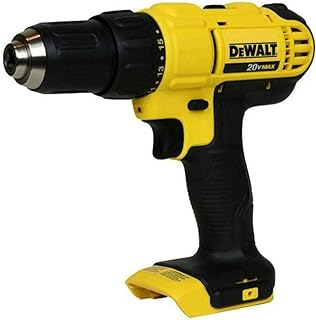

In [169]:
features = preprocess(im.convert('RGB')).unsqueeze(0).to('mps')
with torch.no_grad(), torch.cuda.amp.autocast():
    image_features = model.encode_image(features).cpu().numpy()

d,ind=index.search(image_features, k=1)


image_url = df.loc[ind[0]].imgUrl
response = requests.get(image_url.values[0])
im=Image.open(BytesIO(response.content))
im

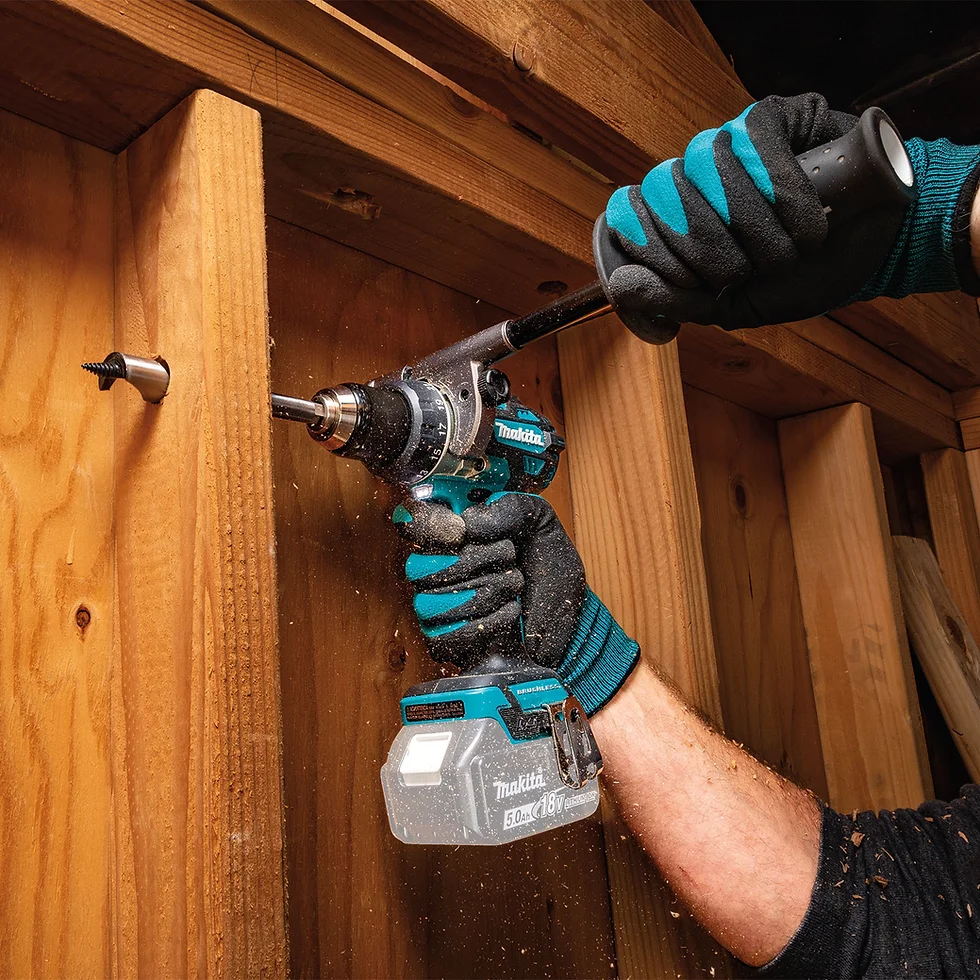

In [179]:
im=Image.open("makita2.webp")
im

/Users/nikita/venv/lib/python3.9/site-packages/torch/amp/autocast_mode.py:202: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


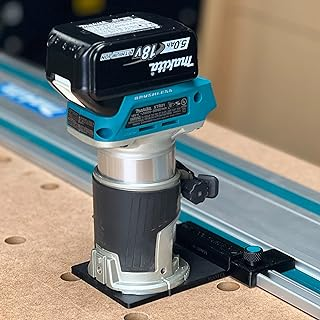

In [180]:
features = preprocess(im.convert('RGB')).unsqueeze(0).to('mps')
with torch.no_grad(), torch.cuda.amp.autocast():
    image_features = model.encode_image(features).cpu().numpy()

d,ind=index.search(image_features, k=1)


image_url = df.loc[ind[0]].imgUrl
response = requests.get(image_url.values[0])
im=Image.open(BytesIO(response.content))
im

In [177]:
df[df['price'] > 200].sort_values(by='price')[['title', 'imgUrl']].to_csv('test2.csv')

In [181]:
df=pd.read_csv("data/archive-3/amazon_products.csv")

In [202]:
df[(df['price']> 200) & (df['price'] < 5000)][df['reviews'] > 0].sort_values(by=['price'])

/var/folders/kt/nvtw2xz541g_9093jj576bz00000gn/T/ipykernel_43047/1417696470.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[(df['price']> 200) & (df['price'] < 5000)][df['reviews'] > 0].sort_values(by=['price'])


,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
198331,B0C124QWJ6,Sceptre 32-inch IPS QHD Monitor 2560 x 1440 11...,https://m.media-amazon.com/images/I/71IjHRsCGS...,https://www.amazon.com/dp/B0C124QWJ6,3.6,5,200.05,209.97,56,False,0
180907,B01BHJE0J4,"DEWALT Mechanics Tool Set, SAE and Metric, 1/2...",https://m.media-amazon.com/images/I/81Xt5+ZcE5...,https://www.amazon.com/dp/B01BHJE0J4,4.8,6636,200.13,277.99,17,False,1000
221481,B09RC68GFQ,Destinations 3-Piece Hardside Spinner Luggage ...,https://m.media-amazon.com/images/I/91Y0yhynYP...,https://www.amazon.com/dp/B09RC68GFQ,5.0,2,200.25,0.00,108,False,0
315808,B09SBZ19D3,Fire Emblem Warriors: Three Hopes [Limited Edi...,https://m.media-amazon.com/images/I/81ukl+F-Sz...,https://www.amazon.com/dp/B09SBZ19D3,4.6,217,200.29,0.00,260,False,0
160195,B0BMJL12QY,Delta Children Tree Bookcase - Greenguard Gold...,https://m.media-amazon.com/images/I/71S4hs-UuJ...,https://www.amazon.com/dp/B0BMJL12QY,4.7,72,200.44,0.00,124,False,200
...,...,...,...,...,...,...,...,...,...,...,...
64254,B0B25J8W55,Audeze LCD-5 Open-Back Planar Magnetic Over-Ea...,https://m.media-amazon.com/images/I/61v7hkexN1...,https://www.amazon.com/dp/B0B25J8W55,4.1,4,4500.00,0.00,71,False,0
53913,B0989ZBVN9,Denon AVR-X8500HA 13.2 Channel (150 W/Ch) Rece...,https://m.media-amazon.com/images/I/41Wb9uIEn0...,https://www.amazon.com/dp/B0989ZBVN9,4.6,56,4565.61,0.00,69,False,0
125026,B07VKLHYFR,Canon Imageformula Dr-G2110 Sheetfed Scanner -...,https://m.media-amazon.com/images/I/41VCIwfm1k...,https://www.amazon.com/dp/B07VKLHYFR,3.0,1,4599.00,0.00,72,False,0
180506,B08KWJKWMY,"AC-Dual Fully Automatic Machine, Recovery and ...",https://m.media-amazon.com/images/I/81Do+krMOr...,https://www.amazon.com/dp/B08KWJKWMY,4.7,29,4778.00,0.00,17,False,0


In [186]:
df.loc[347712].imgUrl

'https://m.media-amazon.com/images/I/51Rq-iHShFL._AC_UL320_.jpg'

In [208]:
tools_ids = cats[cats.category_name.str.contains("Tool")]['id']

In [239]:
df[df['category_id'].isin(tools_ids) & (df['price'] > 200)].sort_values(by='price')

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
180907,B01BHJE0J4,"DEWALT Mechanics Tool Set, SAE and Metric, 1/2...",https://m.media-amazon.com/images/I/81Xt5+ZcE5...,https://www.amazon.com/dp/B01BHJE0J4,4.8,6636,200.13,277.99,17,False,1000
680609,B0000225YX,"Freud 91-100: 13 Piece Super Bit Set, One Size...",https://m.media-amazon.com/images/I/71frBrJGK7...,https://www.amazon.com/dp/B0000225YX,4.7,0,200.15,0.00,153,False,0
320977,B078J22VN5,"PORTER-CABLE Tile Cutter, Tile Saw, For Remode...",https://m.media-amazon.com/images/I/71eKfJR7Nn...,https://www.amazon.com/dp/B078J22VN5,4.4,0,200.30,217.99,146,False,200
321442,B07MJ7X6D6,WEN 6524 Oscillating Belt and Spindle Sander,https://m.media-amazon.com/images/I/91Brakn7JS...,https://www.amazon.com/dp/B07MJ7X6D6,4.6,0,200.40,0.00,146,False,400
321975,B09XWY2P2P,Milwaukee 49-66-7016 29PC SHOCKWAVE Impact Dut...,https://m.media-amazon.com/images/I/61ykwV2Y29...,https://www.amazon.com/dp/B09XWY2P2P,4.8,0,200.44,0.00,146,False,100
...,...,...,...,...,...,...,...,...,...,...,...
323397,B09M9NVX3P,Eastwood Motorized Bead Roller and Stand | Met...,https://m.media-amazon.com/images/I/516lLZooHv...,https://www.amazon.com/dp/B09M9NVX3P,4.7,0,1999.99,0.00,146,False,0
325457,B08VXVKJTD,RIDGID RP 351 Battery Kit W/ProPress Jaws (1/2...,https://m.media-amazon.com/images/I/91in6O+tEl...,https://www.amazon.com/dp/B08VXVKJTD,4.9,0,3487.99,0.00,146,False,0
180517,B091HH973J,Tektino RCC-6S-Dual Refrigerant Recovery Recha...,https://m.media-amazon.com/images/I/71s-eZL0VD...,https://www.amazon.com/dp/B091HH973J,5.0,4,4198.99,0.00,17,False,0
1157376,B0CH8G38FX,"63"" Freestanding Bathtub Rectangle Soaking Bat...",https://m.media-amazon.com/images/I/71eshnoAcS...,https://www.amazon.com/dp/B0CH8G38FX,0.0,0,4293.00,0.00,215,False,0


category_id
146    176
153    167
207    163
142    136
173     80
215     60
17      60
213     38
154     20
16      18
205     14
162     13
204      9
175      9
73       9
214      8
212      8
150      7
145      6
143      5
152      5
149      4
19       4
147      4
69       3
71       3
211      3
144      3
208      2
206      2
203      2
76       2
75       1
81       1
82       1
199      1
24       1
151      1
110      1
Name: count, dtype: int64

In [247]:
image_features.shape

(1, 512)